## Load libraries

In [20]:
import specpy.mtspec as mtspec
import specpy.utils as utils
import specpy.mtcross as mtcross
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

## Load Mesetas network data

In [21]:
data = np.loadtxt('../data/sgc_vmm_hhe.dat')
dt   = 1/100.
npts,ntr = np.shape(data)

print('npts, # of traces, dt ',npts, ntr, dt)

npts, # of traces, dt  210001 5 0.01


# Plot time series

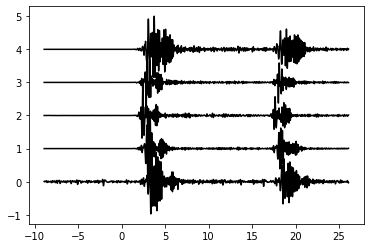

In [22]:
# create time vector
qtime = 8*60+55   # in seconds
t    = np.arange(npts)*dt - qtime

fig = plt.figure()
ax  = fig.add_subplot()
for i in range(ntr):
    x = data[:,i]
    ax.plot(t/60,x/np.max(np.abs(x))+i,'k')#/(np.max(data[:,i]))+i,'k')

# Select stations and channels (HHE)

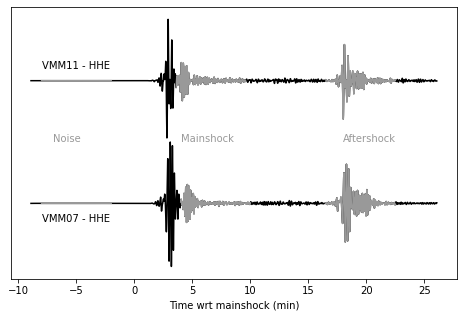

In [23]:
nw    = 4.0
kspec = 7
fmin  = 0.01
fmax  = 0.2

#----------------------------
# Select traces to work with
#----------------------------

itr1  = 1   # VMM07 HHE
itr2  = 3   # VMM11 HHE

t00  = -8*60
t01  = t00 + 6*60
i00  = np.where((t>=t00) & (t<=t01))[0]
x00  = data[i00,itr1]

t10  = -8*60
t11  = t10 + 6*60
i10  = np.where((t>=t10) & (t<=t11))[0]
x10  = data[i10,itr2]

t20  = 4*60
t21  = t20 + 6*60
i20  = np.where((t>=t20) & (t<=t21))[0]
x20  = data[i20,itr1]

t30  = 3.6*60
t31  = t30 + 6*60
i30  = np.where((t>=t30) & (t<=t31))[0]
x30  = data[i30,itr2]

t40  = 16.5*60
t41  = t40 + 6*60
i40  = np.where((t>=t40) & (t<=t41))[0]
x40  = data[i40,itr1]

t50  = 16.5*60
t51  = t50 + 6*60
i50  = np.where((t>=t50) & (t<=t51))[0]
x50  = data[i50,itr2]

max00 = np.max(data[:,itr1])
max10 = np.max(data[:,itr2])

fig = plt.figure(figsize=(8,5))
ax0 = fig.add_subplot()
ax0.plot(t/60,data[:,itr1]/max00,'k')
ax0.plot(t/60,data[:,itr2]/max10+2,'k')
ax0.plot(t[i00]/60,x00/max00,'0.6')
ax0.plot(t[i10]/60,x10/max10+2,'0.6')
ax0.plot(t[i20]/60,x20/max00,'0.6')
ax0.plot(t[i30]/60,x30/max10+2,'0.6')
ax0.plot(t[i40]/60,x40/max00,'0.6')
ax0.plot(t[i50]/60,x50/max10+2,'0.6')
ax0.text(-8,-0.3,'VMM07 - HHE')
ax0.text(-8,2.2,'VMM11 - HHE')
ax0.text(-7,1.0,'Noise',color='0.6')
ax0.text(+4,1.0,'Mainshock',color='0.6')
ax0.text(18,1.0,'Aftershock',color='0.6')
ax0.set_yticks([])
ax0.set_xlabel('Time wrt mainshock (min)')
plt.savefig('figures/df_waveforms.png')

#fig = plt.figure()
#ax0 = fig.add_subplot()
#ax0.plot(t[i40]/60,x20/np.max(x00),'k')
#ax0.plot(t[i50]/60,x30/np.max(x10),'m')


# Calculate dual - frequency coherences

In [24]:
px00   = mtspec.mtspec(x00,nw,kspec,dt)
px10   = mtspec.mtspec(x10,nw,kspec,dt)
px20   = mtspec.mtspec(x20,nw,kspec,dt)
px30   = mtspec.mtspec(x30,nw,kspec,dt)
px40   = mtspec.mtspec(x40,nw,kspec,dt)
px50   = mtspec.mtspec(x50,nw,kspec,dt)
print('Finished spectra')

Sx,cx00,phx,freq    = utils.df_spec(px00,fmin=fmin,fmax=fmax)
Sy,cx20,phy,freq    = utils.df_spec(px20,fmin=fmin,fmax=fmax)
Sz,cx40,phz,freq    = utils.df_spec(px40,fmin=fmin,fmax=fmax)
Sxy,cx01,phxy,freq  = utils.df_spec(px00,px10,fmin=fmin,fmax=fmax)
Sxz,cx23,phxz,freq  = utils.df_spec(px20,px30,fmin=fmin,fmax=fmax)
Szy,cx45,phzy,freq  = utils.df_spec(px40,px50,fmin=fmin,fmax=fmax)
print('Finished df-spectra')

Finished spectra
Finished df-spectra


2W  0.011110648167437467


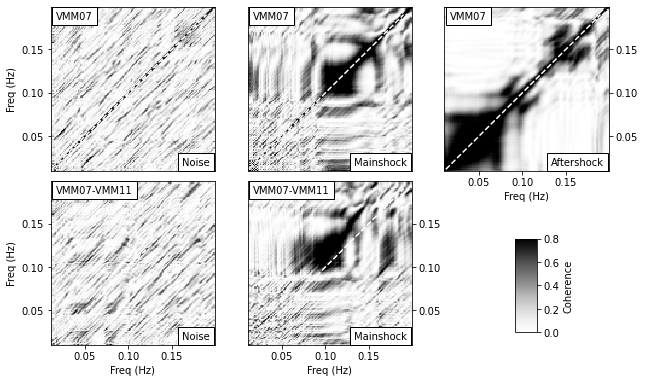

In [26]:
X, Y = np.meshgrid(freq,freq)
print('2W ', 2*nw*(freq[2]-freq[1]))

cmap='gray'
cmap='Greys'
#cmap='turbo'
vmx = 0.8

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,3,1)
c = ax1.pcolor(X, Y, cx00,
                       cmap=cmap, shading='auto',
                       vmin=-0.0, vmax=vmx)
ax1.axis('equal')

ax2 = fig.add_subplot(2,3,2)
c = ax2.pcolor(X, Y, cx20,
                       cmap=cmap, shading='auto',
                       vmin=-0.0, vmax=vmx)
ax2.axis('equal')
ax3 = fig.add_subplot(2,3,3)
c = ax3.pcolor(X, Y, cx40,
                       cmap=cmap, shading='auto',
                       vmin=-0.0, vmax=vmx)

ax3.axis('equal')
ax4 = fig.add_subplot(2,3,4)
c = ax4.pcolor(X, Y, cx01,
                       cmap=cmap, shading='auto',
                       vmin=-0.0, vmax=vmx)
ax4.axis('equal')
ax5 = fig.add_subplot(2,3,5)
c = ax5.pcolor(X, Y, cx23,
                       cmap=cmap, shading='auto',
                       vmin=-0.0, vmax=vmx)
ax5.axis('equal')

#---------------------------
# Add line f1=f2
#---------------------------
ax1.plot((0.012,0.19),(0.012,0.19),'w--')
ax2.plot((0.012,0.19),(0.012,0.19),'w--')
ax3.plot((0.012,0.19),(0.012,0.19),'w--')
ax4.plot((0.012,0.19),(0.012,0.19),'w--')
ax5.plot((0.012,0.19),(0.012,0.19),'w--')

#---------------------------
# Add colorbar
#---------------------------
cbaxes = fig.add_axes([0.77, 0.37, 0.03, 0.13])  
cb = plt.colorbar(c, cax=cbaxes)
cb.set_label('Coherence')

#---------------------------
# Make axis equal
#---------------------------
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
ax3.set_aspect('equal', 'box')
ax4.set_aspect('equal', 'box')
ax5.set_aspect('equal', 'box')

ax3.yaxis.tick_right()
ax5.yaxis.tick_right()
ax1.set_xticks([])
ax1.set_yticks([0.05, 0.1,0.15])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_yticks([0.05, 0.1,0.15])
ax4.set_yticks([0.05, 0.1,0.15])
ax5.set_yticks([0.05, 0.1,0.15])

ax1.set_ylabel('Freq (Hz)')
ax4.set_ylabel('Freq (Hz)')
ax3.set_xlabel('Freq (Hz)')
ax4.set_xlabel('Freq (Hz)')
ax5.set_xlabel('Freq (Hz)')

#---------------------------------------------
# Add text boxes
#---------------------------------------------
props = dict(facecolor='white', alpha=1.0)
ax1.text(0.017, 0.185, 'VMM07',bbox=props, fontsize=10)
ax1.text(0.162, 0.017, 'Noise',bbox=props, fontsize=10)
ax2.text(0.017, 0.185, 'VMM07',bbox=props, fontsize=10)
ax2.text(0.133, 0.017, 'Mainshock',bbox=props, fontsize=10)
ax3.text(0.017, 0.185, 'VMM07',bbox=props, fontsize=10)
ax3.text(0.133, 0.017, 'Aftershock',bbox=props, fontsize=10)

ax4.text(0.017, 0.185, 'VMM07-VMM11',bbox=props, fontsize=10)
ax4.text(0.162, 0.017, 'Noise',bbox=props, fontsize=10)
ax5.text(0.017, 0.185, 'VMM07-VMM11',bbox=props, fontsize=10)
ax5.text(0.133, 0.017, 'Mainshock',bbox=props, fontsize=10)

#---------------------------------------------
# move boxes
#---------------------------------------------

box    = ax4.get_position()
box.y0 = box.y0 +0.17
box.y1 = box.y1 +0.17
ax4.set_position(box)
box    = ax5.get_position()
box.y0 = box.y0 +0.17
box.y1 = box.y1 +0.17
ax5.set_position(box)

plt.savefig('figures/df_coherence.png')
